**Q1. Perform Basic EDA (Exploratory Data Analysis)**


In [19]:
#Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore


In [20]:
# Load the dataset
url = "https://drive.google.com/uc?id=1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P"
df = pd.read_csv(url)

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Describe dataset
print(df.describe())


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


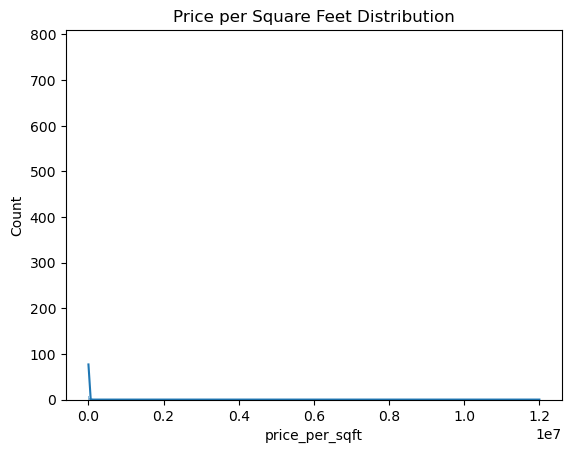

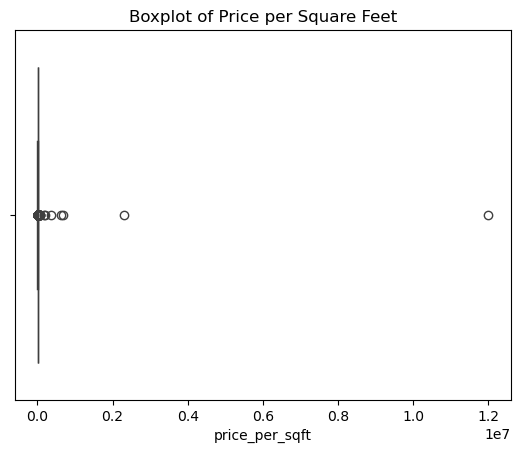

In [23]:
# Check for null values
print("Missing Values:\n", df.isnull().sum())

# Histogram for `price per sqft`
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Price per Square Feet Distribution")
plt.show()

# Boxplot for `price per sqft`
sns.boxplot(data=df, x='price_per_sqft')
plt.title("Boxplot of Price per Square Feet")
plt.show()


**Q2: Outlier Detection and Removal**


*a) Mean and Standard Deviation*

In [72]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

df_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print("Mean",mean)
print("Standard_deviation",std)
print("Lower_bound",lower_bound)
print("Upper_bound",upper_bound)


Mean 7920.336742424242
Standard_deviation 106727.16032810845
Lower_bound -312261.1442419011
Upper_bound 328101.8177267496


*b) Percentile Method*

In [70]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
print("lower_percentile",lower_percentile)
print("upper_percentile",upper_percentile)

lower_percentile 3107.8500000000004
upper_percentile 15312.099999999984


*c) IQR Method*

In [74]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print("Lower_bound",lower_bound)
print("Upper_bound",upper_bound)


Lower_bound -308.0
Upper_bound 11892.0


*d) Z-Score Method*

In [90]:
z_scores = zscore(df['price_per_sqft'])
df_zscore = df[(np.abs(z_scores) <= 3)]
print("z_scores",z_scores)

z_scores 0       -0.039554
1       -0.030971
2       -0.033876
3       -0.015698
4       -0.034391
           ...   
13195   -0.011538
13196    0.029897
13197   -0.024946
13198    0.023300
13199   -0.045260
Name: price_per_sqft, Length: 13200, dtype: float64


*Q3: Boxplots for Comparison*

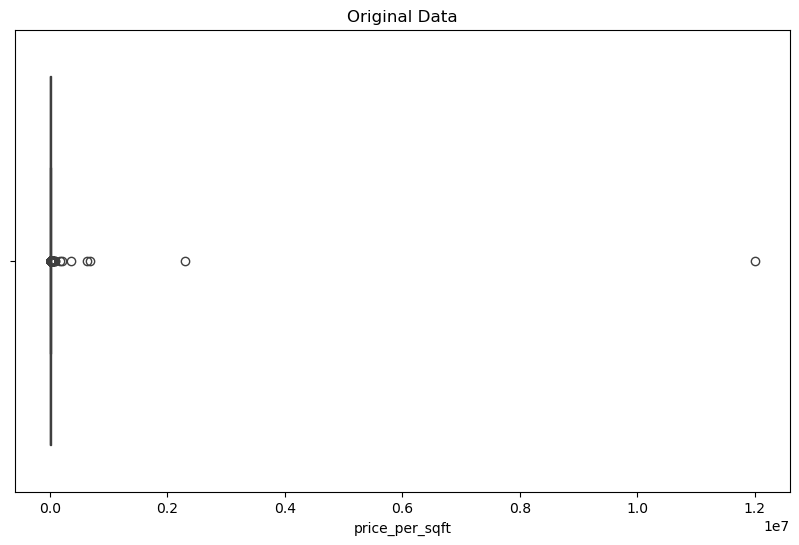

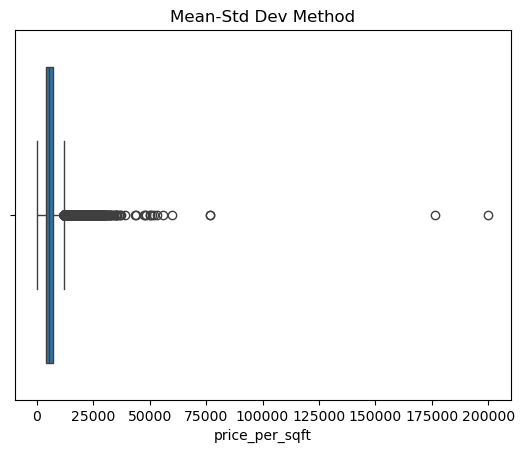

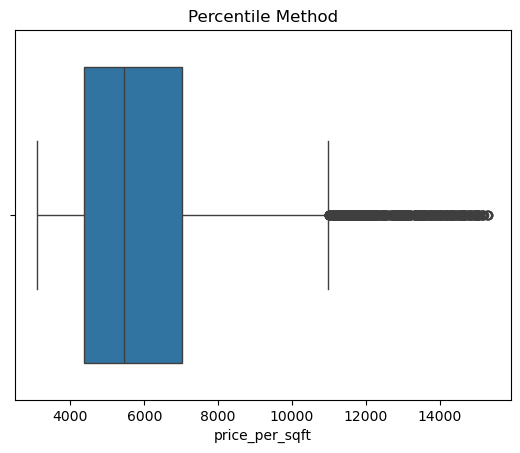

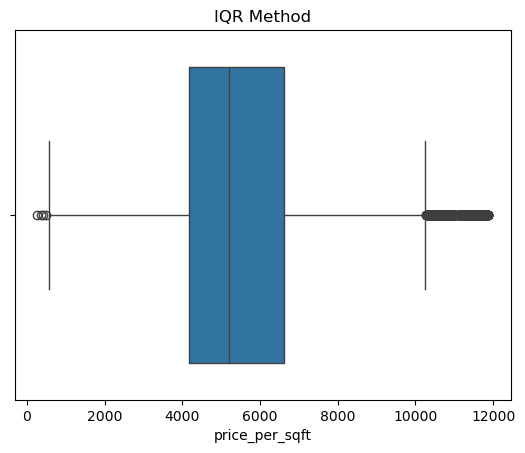

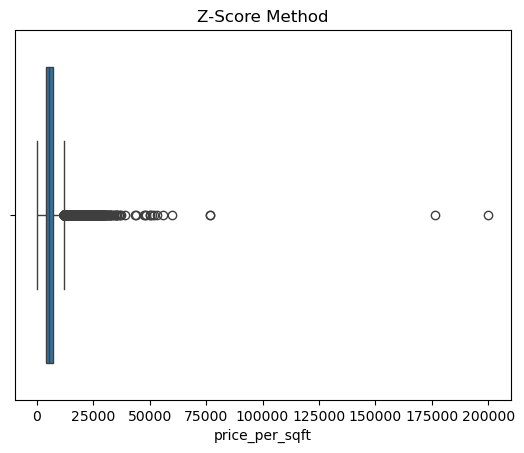

In [98]:
plt.figure(figsize=(10, 6))

# Original
sns.boxplot(data=df, x='price_per_sqft')
plt.title("Original Data")
plt.show()

# Mean-Std Dev
sns.boxplot(data=df_mean_std, x='price_per_sqft')
plt.title("Mean-Std Dev Method")
plt.show()

# Percentile
sns.boxplot(data=df_percentile, x='price_per_sqft')
plt.title("Percentile Method")
plt.show()

# IQR
sns.boxplot(data=df_iqr, x='price_per_sqft')
plt.title("IQR Method")
plt.show()

# Z-Score
sns.boxplot(data=df_zscore, x='price_per_sqft')
plt.title("Z-Score Method")
plt.show()


*Q4: Histogram, Skewness, and Kurtosis*

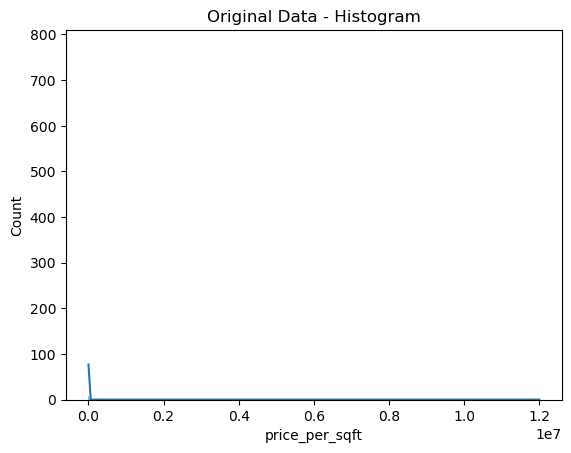

Skewness (Original): 108.26875024325159
Kurtosis (Original): 12090.633538860382


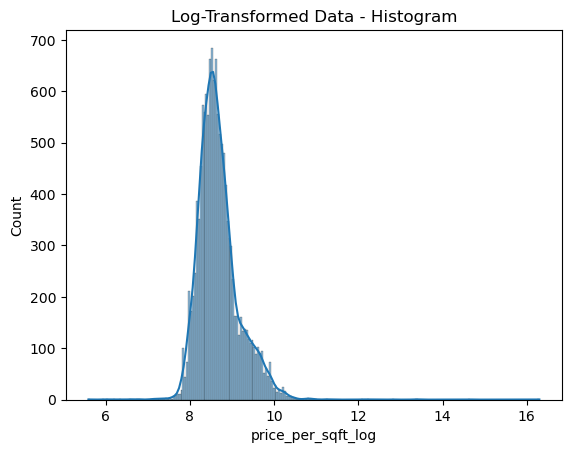

Skewness (Log-Transformed): 1.4003259019533636
Kurtosis (Log-Transformed): 9.203000543610957


In [104]:
# Histogram before transformation
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Original Data - Histogram")
plt.show()

# Skewness and Kurtosis before transformation
print("Skewness (Original):", skew(df['price_per_sqft']))
print("Kurtosis (Original):", kurtosis(df['price_per_sqft']))

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Histogram after transformation
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Log-Transformed Data - Histogram")
plt.show()

# Skewness and Kurtosis after transformation
print("Skewness (Log-Transformed):", skew(df['price_per_sqft_log']))
print("Kurtosis (Log-Transformed):", kurtosis(df['price_per_sqft_log']))


*Q5: Correlation and Heatmap*

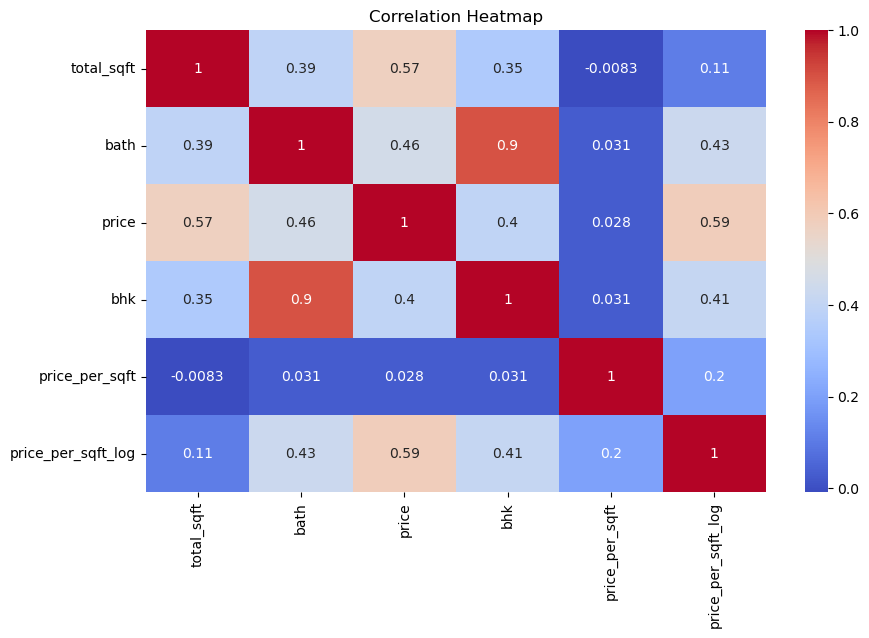

In [132]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


*Q6: Scatter Plots*

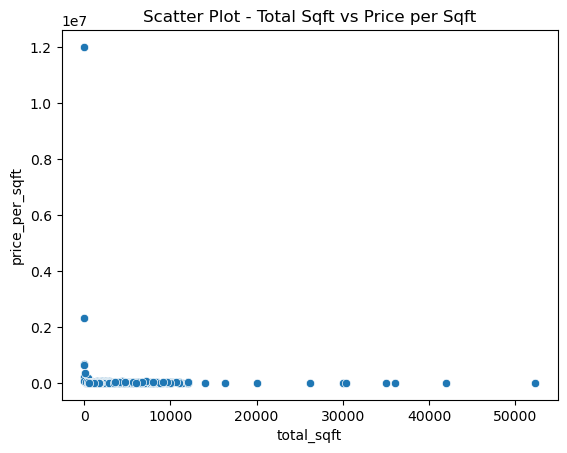

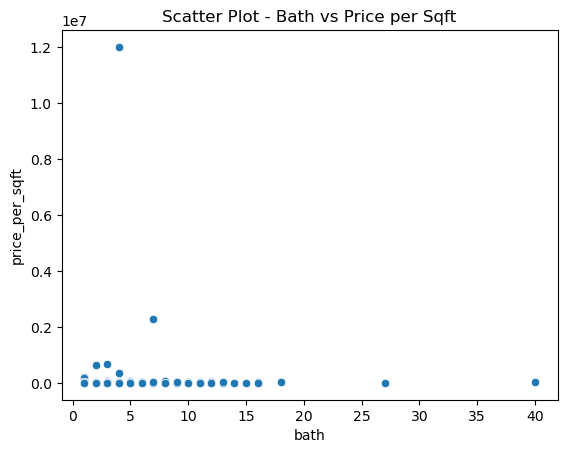

In [116]:
# Scatter plot between price_per_sqft and other variables
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title("Scatter Plot - Total Sqft vs Price per Sqft")
plt.show()

sns.scatterplot(data=df, x='bath', y='price_per_sqft')
plt.title("Scatter Plot - Bath vs Price per Sqft")
plt.show()
